In [2]:
#!/usr/bin/env python
"""
Script to calculate Mutual Information between two discrete random variables

Roberto Maestre - rmaestre@gmail.com
Bojan Mihaljevic - boki.mihaljevic@gmail.com
"""
from __future__ import division
from numpy import array, shape, where, in1d
import math
import time
import nose

class InformationTheoryTool:
    
    def __init__(self, data):
        """
        """
        # Check if all rows have the same length
        assert (len(data.shape) == 2)
        # Save data
        self.data = data
        self.n_rows = data.shape[0]
        self.n_cols = data.shape[1]
        
        
    def single_entropy(self, x_index, log_base, debug=False):
        """
        Calculate the entropy of a random variable
        """
        # Check if index are into the bounds
        assert (x_index >= 0 and x_index <= self.n_rows)
        # Variable to return entropy
        summation = 0.0
        # Get unique values of random variables
        values_x = set(self.data[x_index])
        # Print debug info
        if debug:
            print('Entropy of')
            print(self.data[x_index])
        # For each random value
        for value_x in values_x:
            px = shape(where(self.data[x_index] == value_x))[1] / self.n_cols
            if px > 0.0:
                summation += px * math.log(px, log_base)
            if debug:
                print(f'({value_x}) px:{px}')
        if summation == 0.0:
            return summation
        else:
            return -summation
        
        
    def entropy(self, x_index, y_index, log_base, debug=False):
        """
        Calculate the entropy between two random variables
        """
        assert (x_index >= 0 and x_index <= self.n_rows)
        assert (y_index >= 0 and y_index <= self.n_rows)
        # Variable to return entropy
        summation = 0.0
        # Get unique values of random variables
        values_x = set(self.data[x_index])
        values_y = set(self.data[y_index])
        # Print debug info
        if debug:
            print('Entropy between')
            print(self.data[x_index])
            print(self.data[y_index])
        # For each random value pair
        for value_x in values_x:
            for value_y in values_y:
                pxy = len(where(in1d(where(self.data[x_index] == value_x)[0], 
                                     where(self.data[y_index] == value_y)[0]) == True)[0]) / self.n_cols
                if pxy > 0.0:
                    summation += pxy * math.log(pxy, log_base)
                if debug:
                    print(f'({value_x},{value_y}) pxy:{pxy}')
        if summation == 0.0:
            return summation
        else:
            return -summation
        
        
    def mutual_information(self, x_index, y_index, log_base, debug=False):
        """
        Calculate and return Mutual Information between two random variables
        """
        # Check if index are into the bounds
        assert (x_index >= 0 and x_index <= self.n_rows)
        assert (y_index >= 0 and y_index <= self.n_rows)
        # Variable to return MI
        summation = 0.0
        # Get unique values of random variables
        values_x = set(self.data[x_index])
        values_y = set(self.data[y_index])
        # Print debug info
        if debug:
            print('MI between')
            print(self.data[x_index])
            print(self.data[y_index])
        # For each random value pair
        for value_x in values_x:
            for value_y in values_y:
                px = shape(where(self.data[x_index] == value_x))[1] / self.n_cols
                py = shape(where(self.data[y_index] == value_y))[1] / self.n_cols
                pxy = len(where(in1d(where(self.data[x_index] == value_x)[0], 
                                     where(self.data[y_index] == value_y)[0]) == True)[0]) / self.n_cols
                if pxy > 0.0:
                    summation += pxy * math.log((pxy / (px * py)), log_base)
                if debug:
                    print(f'({value_x},{value_y}) px:{px} py:{py} pxy:{pxy}')
        return summation


In [20]:
import numpy as np

Js = np.load('J_composers_global.npy')
xi = np.load('xi_index_global.npy')
print(xi)
# Define tus datos en forma de array
data = np.array([
    np.load('xi_index_global.npy'),  # Variable X
    np.load('J_composers_lineal_global.npy')   # Variable Y
])
print(np.shape(data))
# np.load('J_composers_lineal_global')
# np.load('J_composers_hermite_global')


# Crear el objeto InformationTheoryTool
it_tool = InformationTheoryTool(data)

# Calcular la información mutua entre X (fila 0) e Y (fila 1)
mi = it_tool.mutual_information(0, 1, 2)  # Base 2 para bits
print(f"Información mutua entre X e Y: {mi:.4f}")


[0.85987784 0.91307707 0.62343031 ... 1.5029352  1.34206833 0.89027644]
(2, 2677)
Información mutua entre X e Y: 11.3503


In [13]:
def generar_uniforme_centrada(n, varianza):
    # Calcular el límite superior e inferior de la distribución uniforme
    limite = np.sqrt(varianza)
    # Generar n números aleatorios con distribución uniforme entre -limite y limite
    return np.random.uniform(-limite, limite, n)

In [14]:
import numpy as np
data2 = np.array([
    generar_uniforme_centrada(2677, 1e-6),  # Variable X
    generar_uniforme_centrada(2677, 1e-6)   # Variable Y
])
# print(np.shape(data))
# np.load('J_composers_lineal_global')
# np.load('J_composers_hermite_global')


# Crear el objeto InformationTheoryTool
it_tool2 = InformationTheoryTool(data2)

# Calcular la información mutua entre X (fila 0) e Y (fila 1)
mi2 = it_tool2.mutual_information(0, 1, 2)  # Base 2 para bits
print(f"Información mutua entre X e Y: {mi2:.4f}")

Información mutua entre X e Y: 11.3864


In [15]:
import numpy as np

def mutual_information(X, Y):
    """
    Calcula la información mutua discreta entre dos variables aleatorias X e Y.

    Parámetros:
        X (array-like): Variable aleatoria discreta 1.
        Y (array-like): Variable aleatoria discreta 2.

    Retorna:
        float: Información mutua entre X e Y.
    """
    # Asegurarse de que X e Y sean numpy arrays
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    # Obtener los valores únicos y sus conteos para las distribuciones marginales
    unique_x, counts_x = np.unique(X, return_counts=True)
    unique_y, counts_y = np.unique(Y, return_counts=True)
    
    # Calcular las probabilidades marginales
    p_x = counts_x / len(X)
    p_y = counts_y / len(Y)
    
    # Crear una matriz conjunta
    joint_counts = np.zeros((len(unique_x), len(unique_y)))
    
    for i, x_val in enumerate(unique_x):
        for j, y_val in enumerate(unique_y):
            joint_counts[i, j] = np.sum((X == x_val) & (Y == y_val))
    
    # Convertir los conteos conjuntos a probabilidades
    p_xy = joint_counts / len(X)
    
    # Calcular la información mutua
    mi = 0
    for i in range(len(unique_x)):
        for j in range(len(unique_y)):
            if p_xy[i, j] > 0:  # Evitar log(0)
                mi += p_xy[i, j] * np.log(p_xy[i, j] / (p_x[i] * p_y[j]))
    
    return mi


In [16]:
mutual_information(data2[0,:], data2[1,:])

7.892452043520675

In [18]:
Js = np.load('J_composers_global.npy')
xi = np.load('xi_index_global.npy')
mutual_information(Js, xi)

7.867399605165235

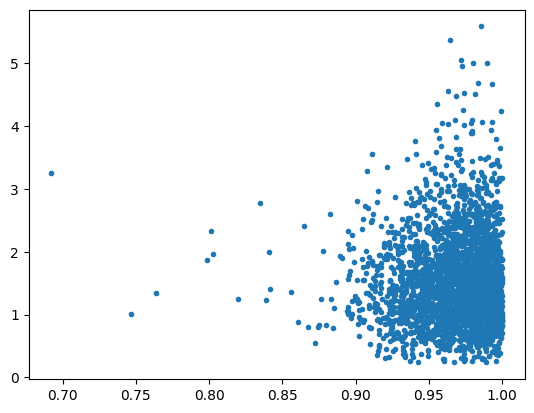

In [20]:
import matplotlib.pyplot as plt
plt.plot(Js, xi, '.')